# 탄소중립을 위한 기후기술 정보 시각화
### (Visualizationof Climate Technology Information for Carbon Neutrality)
## 1. 소개
### 기후기술이란?
**탄소중립 달성**을 위해 온실가스를 감축하고 기후변화에 적응하기 위한 기술을 의미합니다.  
해당 프로젝트에서는, 기후기술과 관련하여 다양한 정보를 수집하고 시각화를 해본 프로젝트입니다.  

### [기후기술 분류 체계](https://www.ctis.re.kr/ko/techClass/classification.do?key=1141)
기후기술은 **감축**, **적응**, **융복합**의 3개 분야의 45개 기술분류로 구분되어 활용되고 있습니다.

In [375]:
sys_type = pd.read_html("https://www.ctis.re.kr/ko/techClass/classification.do?key=1141")
sys_type = sys_type[0]
sys_type.columns = ["대분류", "중분류", "중분류1", "중분류2", "분야", "소분류"]
sys_type["중분류"][20:] = sys_type["중분류"][20:].str.split(")", expand=True)[1]
sys_type["중분류1"][17:] = sys_type["중분류1"][17:].str.split(")", expand=True)[1]
sys_type["중분류2"][17:] = sys_type["중분류2"][17:].str.split(")", expand=True)[1]
sys_type["분야"] = sys_type["분야"].str.split(")", expand=True)[1]
sys_type["소분류"] = sys_type["소분류"].str.split(".", expand=True)[1]

In [376]:
sys_type["대분류"].value_counts()

감축              22
적응              18
감축/  적응  융복합     5
Name: 대분류, dtype: int64

In [378]:
sys_type.describe()

,대분류,중분류,중분류1,중분류2,분야,소분류
count,45,45,45,45,45,45
unique,3,9,11,11,14,45
top,감축,온실가스 저감,에너지 생산 & 공급,발전 & 전환,재생 에너지,원자력 발전
freq,22,20,13,13,8,1


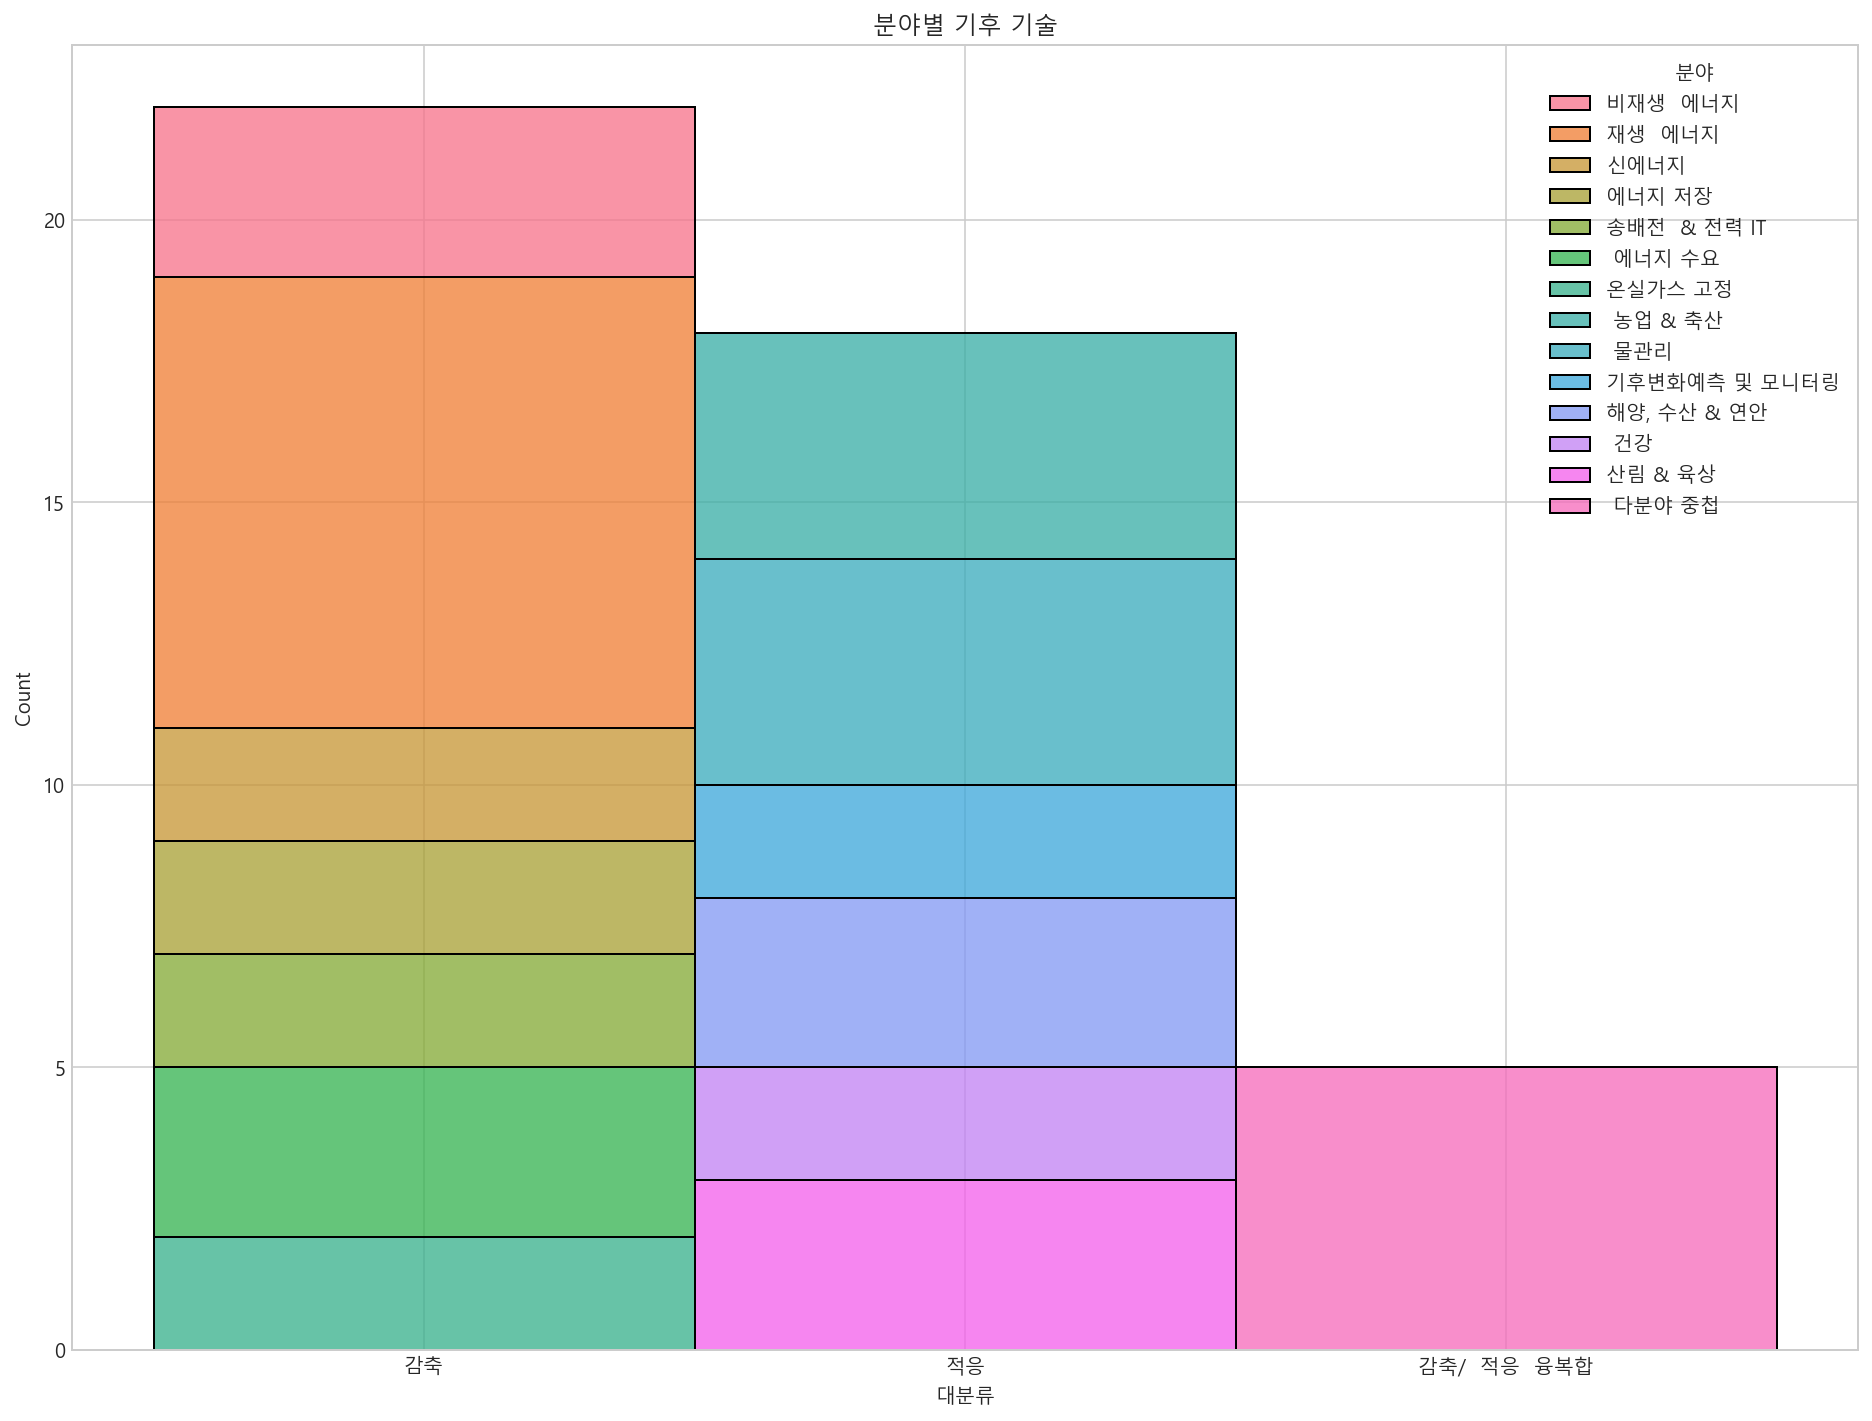

In [412]:
plt.figure(figsize=(16, 12))
_ = sns.histplot(data=sys_type, x="대분류", hue="분야", multiple="stack").set_title("분야별 기후 기술")

In [382]:
px.bar(sys_type, x="대분류", color="분야", title="기후 기술 분류별 분야")

In [383]:
px.bar(sys_type[sys_type["대분류"]=="감축"], x="분야", color="소분류", title="분야별 소분류 (감축)")

In [384]:
px.bar(sys_type[sys_type["대분류"]=="적응"], x="분야", color="소분류", title="분야별 소분류 (적응)")

## 2. 목표
해당 프로젝트의 목적은 기후기술과 관련하여 다양한 정보를 수집하고 시각화하는 것입니다.  

## 3. 사용 데이터 셋
[KOSIS 국가통계포털](https://kosis.kr/statHtml/statHtml.do?orgId=442&tblId=DT_21_01&vw_cd=MT_ZTITLE&list_id=N2_5&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=B4&path=%252FstatisticsList%252FstatisticsListIndex.do)에 등록되어있는 기후 기술 영역 데이터를 이용했습니다.  
  
생각보다 방대한 양의 데이터가 있어, 비슷한 분류끼리 나눠봤습니다.

---
- 기후기술 부문별·기업규모별 매출액 현황 기후기술 부문별·기업규모별 매출액 현황 (2012~2018) -> `sale1218`
- 기후기술 영역별 기관규모별 매출액 기후기술 영역별 기관규모별 매출액 (2019~2020) -> `sale1920`
- 기후기술 부문별·기업규모별 연구개발비 현황 기후기술 부문별·기업규모별 연구개발비 현황 (2012~2018) -> `rnd1218`
- 기후기술 영역별 기관규모별 연구개발비 기후기술 영역별 기관규모별 연구개발비 (2019~2020) -> `rnd1920`
---
- 기후기술 부문별·기업규모별 종사자수 현황 기후기술 부문별·기업규모별 종사자수 현황 (2012~2018) -> `nemp1218`
- 기후기술 영역별 기관규모별 종사자 수 기후기술 영역별 기관규모별 종사자 수 (2019~2020) -> `nemp1920`
- 기후기술 영역별 기관규모별 연구원 수 기후기술 영역별 기관규모별 연구원 수 (2019~2020) -> `nrsc1920`
---
- 기후기술 영역별 기관규모별 수출액 기후기술 영역별 기관규모별 수출액 (2019~2020) -> `per_sale1920`
- 기후기술 영역별 기술수명주기 단계 기후기술 영역별 기술수명주기 단계 (2019~2020) -> `life_cycle1920`
- 기후기술 영역별 기업 및 기관의 누적 특허 건수 기후기술 영역별 기업 및 기관의 누적 특허 건수 (2019~2020) -> `누적특허건수`
- 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 (2019~2019) -> `기술이전실적2019`
- 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 (2020~2020) -> `기술이전실적2020`
- 기후기술 영역별 해외진출지역(복수응답) 기후기술 영역별 해외진출지역(복수응답) (2019~2020) -> `해외진출지역`
- 기후기술 영역별 국내/해외 기술이전 방식 기후기술 영역별 국내/해외 기술이전 방식 (2019~2019) -> `기술이전방식2019`
- 기후기술 영역별 국내 기술이전 선호 항목(복수응답) 기후기술 영역별 국내 기술이전 선호 항목(복수응답) (2020~2020) -> `기술이전선호항목2020`
---
- 기후기술 영역별 정부지원 사업 수혜 여부 및 정책수단 종류(복수응답) 기후기술 영역별 정부지원 사업 수혜 여부 및 정책수단 종류(복수응답) (2019~2020) -> `정책`
---

## 4. 구현

#### 라이브러리 로드

In [403]:
# For Scraping
import requests
from bs4 import BeautifulSoup as bs
# For data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# For convert plotly to iframe
import chart_studio
import chart_studio.tools as ct
import chart_studio.plotly as cp
# convert plotly to iframe
# ct.get_embed(cp.plot(fig, filename= , auto_open=Fasle))

In [404]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats

%config InlineBackend.figure_format = "retina"

### 1. Data Load

In [422]:
# 기후기술 인력
'''
- 기후기술 부문별·기업규모별 종사자수 현황 기후기술 부문별·기업규모별 종사자수 현황 (2012~2018) -> df_Nemp
- 기후기술 영역별 기관규모별 종사자 수 기후기술 영역별 기관규모별 종사자 수 (2019~2020) -> df_Nemp_e
- 기후기술 영역별 기관규모별 연구원 수 기후기술 영역별 기관규모별 연구원 수 (2019~2020) -> df_Nrsc
'''
df_Nemp = pd.read_csv("data/기후기술_부문별·기업규모별_종사자수_현황_20220531140930.csv", encoding="cp949")
df_Nemp_e = pd.read_csv("data/기후기술_영역별_기관규모별_종사자_수_20220531140641.csv", encoding="cp949")
df_Nrsc = pd.read_csv("data/기후기술_영역별_기관규모별_연구원_수_20220531140632.csv", encoding="cp949")

In [423]:
# 기후기술 매출 및 연구개발비
'''
- 기후기술 부문별·기업규모별 매출액 현황 기후기술 부문별·기업규모별 매출액 현황 (2012~2018) -> df_sales_1218
- 기후기술 영역별 기관규모별 매출액 기후기술 영역별 기관규모별 매출액 (2019~2020) -> df_sales_1920
- 기후기술 부문별·기업규모별 연구개발비 현황 기후기술 부문별·기업규모별 연구개발비 현황 (2012~2018) -> df_rnd_1218
- 기후기술 영역별 기관규모별 연구개발비 기후기술 영역별 기관규모별 연구개발비 (2019~2020) -> df_rnd_1920
'''
df_sales_1218 = pd.read_csv("data/기후기술_부문별·기업규모별_매출액_현황_20220531140844.csv", encoding="cp949")
df_sales_1920 = pd.read_csv("data/기후기술_영역별_기관규모별_매출액_20220531140531.csv", encoding="cp949")
df_rnd_1218 = pd.read_csv("data/기후기술_부문별·기업규모별_연구개발비_현황_20220531140903.csv", encoding="cp949")
df_rnd_1920 = pd.read_csv("data/기후기술_영역별_기관규모별_연구개발비_20220531140624.csv", encoding="cp949")

In [426]:
# 기후기술 수출 관련
'''
- 기후기술 영역별 기관규모별 수출액 기후기술 영역별 기관규모별 수출액 (2019~2020)
- 기후기술 영역별 기술수명주기 단계 기후기술 영역별 기술수명주기 단계 (2019~2020)
- 기후기술 영역별 기업 및 기관의 누적 특허 건수 기후기술 영역별 기업 및 기관의 누적 특허 건수 (2019~2020)
- 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 (2019~2019)
- 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 (2020~2020)
- 기후기술 영역별 해외진출지역(복수응답) 기후기술 영역별 해외진출지역(복수응답) (2019~2020)
- 기후기술 영역별 국내/해외 기술이전 방식 기후기술 영역별 국내/해외 기술이전 방식 (2019~2019)
- 기후기술 영역별 국내 기술이전 선호 항목(복수응답) 기후기술 영역별 국내 기술이전 선호 항목(복수응답) (2020~2020)
'''
# 기후기술 지원 정부 정책
'''
- 기후기술 영역별 정부지원 사업 수혜 여부 및 정책수단 종류(복수응답) 기후기술 영역별 정부지원 사업 수혜 여부 및 정책수단 종류(복수응답) (2019~2020)
'''
pass

### 2. Data Preprocessing
##### 데이터 소개 - 결측치 확인 - 중복값 확인 - 병합 - 고유값 확인

### 3. EDA
##### 타입 확인 - 이상치 확인 - 전체 수치 변수의 히스토그램 - 수치 데이터 기술 통계 - 범주 데이터 기술 통계 - 파생 변수 - 상관 계수 - 데이터 집계

## 5. 결론